# Traffic light detection

## Data

Data are taken from bag file under topic `/image_color`.

Simulator ([link](https://drive.google.com/open?id=1lGhMCIBnxB-V4vly0L4Jy9ltfkVJi7jJ)):

    Taken from the simulator and having resolution setting at 800x600

Real image ([link](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic_light_bag_file.zip)):

    Taken from the onsite testing lot and having a resolution of 800x600. You can download it from 

Kitti dataset ([link](http://www.cvlibs.net/datasets/kitti/)):
    
    This dataset does not label any traffic light, but yet has some traffic light images for testing.

Bosch Small Traffic Lights Dataset ([link](https://hci.iwr.uni-heidelberg.de/node/6132)):

    This dataset label all the traffic light in the image, and it is best to test for training and testing.

Microsoft COCO dataset ([link]()):

    This dataset is created by Microsoft and used as a baseline of difference model. Traffic light is annotated in this dataset, and it is labelled as number 10


## Model

There are several trained model on [Tensorflow detection model zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/detection_model_zoo.md)

and YOLO can be downloaded at [here](https://pjreddie.com/darknet/yolo/)
To tranfrom YOLO to Keras, please refer to [this project](https://github.com/qqwweee/keras-yolo3)

The requirement of the model is able to run at 4-5fps, which means the speed should be around 20-25ms
and should be as accuarcy as possible

In [1]:
import keras
from keras import backend as K
import tensorflow as tf
import numpy as np
import os
from PIL import Image

Using TensorFlow backend.


### SSD mobile net v1

In [2]:
import sys
sys.path.append('./model/zoo_script/')

%run ./model/zoo_script/lib/string_int_label_map_pb2.py
%run ./model/zoo_script/lib/label_map_util.py
%run ./model/zoo_script/models/object_detection.py

In [3]:
model_name = "./model/ssd_mobilenet_v1_coco_2018_01_28"

net = Net(graph_fp='%s/frozen_inference_graph.pb' % model_name,
                           labels_fp='./model/zoo_script/data/label.pbtxt',
                           num_classes=90,
                           threshold=0.6)

debug ./data/simulator_traffic_lights/image_color/frame000000.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.89424354
[INFO] traffic light: 0.7625948
debug ./data/simulator_traffic_lights/image_color/frame000110.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./data/simulator_traffic_lights/image_color/frame000140.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./data/simulator_traffic_lights/image_color/frame000167.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./data/simulator_traffic_lights/image_color/frame000223.png
[INFO] Read the image ..
[INFO] Shape of 

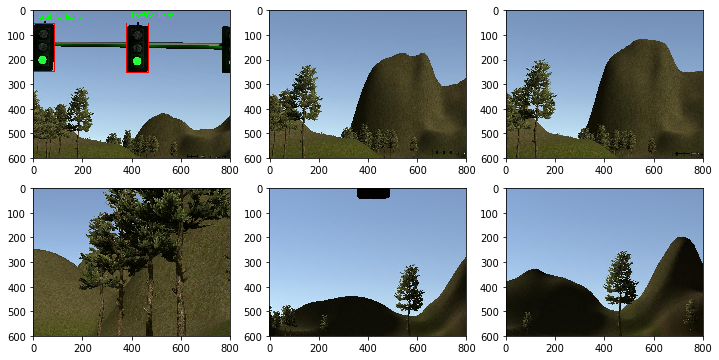

In [32]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

simulator_image_path = './data/simulator_traffic_lights/image_color'
real_image_path = './data/traffic_light_bag_file/image_color'

simulator_image = ['frame000000.png', 'frame000110.png', 'frame000140.png',
                   'frame000167.png', 'frame000223.png', 'frame000246.png']
real_image = ['frame000000.png', 'frame000048.png', 'frame000053.png',
            'frame000116.png', 'frame000193.png', 'frame000284.png']

plt.figure()
fig, axes = plt.subplots(2,3, figsize=(12,6))
for i,image_name in enumerate(simulator_image):
    file_path = os.path.join(simulator_image_path, image_name)
    print('debug', file_path)
    image = Image.open(file_path)
    r_image = net.predict2(np.asarray(image))
    axes[i//3,i%3].imshow(r_image)
    
plt.show()

debug ./data/traffic_light_bag_file/image_color/frame000000.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./data/traffic_light_bag_file/image_color/frame000048.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./data/traffic_light_bag_file/image_color/frame000053.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./data/traffic_light_bag_file/image_color/frame000116.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./data/traffic_light_bag_file/image_color/frame000193.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INF

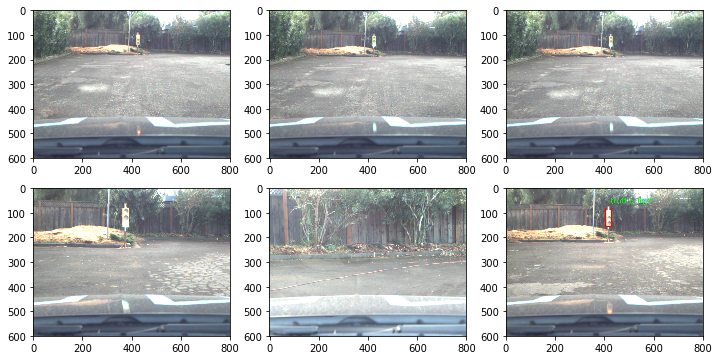

In [35]:
plt.figure()
fig, axes = plt.subplots(2,3, figsize=(12,6))
for i,image_name in enumerate(real_image):
    file_path = os.path.join(real_image_path, image_name)
    print('debug', file_path)
    image = Image.open(file_path)
    r_image = net.predict2(np.asarray(image))
    axes[i//3,i%3].imshow(r_image)
    
plt.show()

In [37]:
from glob import glob
import shutil
import scipy.misc

simulator_infer_path = './run/ssd_mobile_v1_simulator'
real_infer_path = './run/ssd_mobile_v1_real'

output_dir = simulator_infer_path
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

for image_file in glob(os.path.join(simulator_image_path,'*.png')):
    image = Image.open(image_file)
    r_image = net.predict2(np.asarray(image))
    scipy.misc.imsave(os.path.join(simulator_infer_path, os.path.basename(image_file)), r_image)

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...


/home/tom/anaconda3/envs/carnd-capstone/lib/python3.5/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  app.launch_new_instance()


[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.8950851
[INFO] traffic light: 0.7601363
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.88396925
[INFO] traffic light: 0.6605829
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..


[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.9275065
[INFO] traffic light: 0.86428744
[INFO] traffic light: 0.8627209
[INFO] traffic light: 0.77221066
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.84910583
[INFO] traffic light: 0.82585645
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.93745303
[INFO] traffic light: 0.93395895
[INFO] traffic light: 0.68580055
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...


[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.7806069
[INFO] traffic light: 0.70575994
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] umbrella: 0.6351858
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.81413877
[INFO] traffic light: 0.7469077
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results .

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.7234091
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fil

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.64227736
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fi

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.60268104
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.92954016
[INFO] traffic light: 0.87918305
[INFO] traffic light: 0.63316405
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.92154

[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filter

[INFO] Filtering results ...
[INFO] person: 0.79575855
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.90424895
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.8944664
[INFO] traffic light: 0.7582817
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.9021318
[INFO] traffic light: 0.89302206
[INFO] traffic light: 0.8395878
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this 

[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.91796166
[INFO] traffic light: 0.84667623
[INFO] traffic light: 0.6637693
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.6682486
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] cow: 0.6142532
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[I

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] cow: 0.8160318
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.8927401
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.6524178
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 60

[INFO] Filtering results ...
[INFO] traffic light: 0.8262743
[INFO] traffic light: 0.75118065
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.9242005
[INFO] traffic light: 0.8968625
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.909895
[INFO] traffic light: 0.8988509
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.95268905
[INFO] traffic light: 0.9287304
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] elephant: 0.7045276
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filterin

[INFO] Filtering results ...
[INFO] traffic light: 0.9143154
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.80904907
[INFO] traffic light: 0.79005647
[INFO] traffic light: 0.7707536
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.7603127
[INFO] traffic light: 0.65186393
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, 

In [38]:
output_dir = real_infer_path
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

for image_file in glob(os.path.join(real_image_path,'*.png')):
    image = Image.open(image_file)
    r_image = net.predict2(np.asarray(image))
    scipy.misc.imsave(os.path.join(real_infer_path, os.path.basename(image_file)), r_image)

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...


/home/tom/anaconda3/envs/carnd-capstone/lib/python3.5/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  if __name__ == '__main__':


[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.78991187
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fi

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.6494496
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fil

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.60624385
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fi

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.7093287
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fil

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.7446599
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fil

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.72620416
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fi

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.60212576
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.69262356
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.6914311
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fil

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffi

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.6265324
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fil

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffi

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffi

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.7245143
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fil

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.6260443
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fil

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.76170886
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fi

## SSD mobile net  v2

In [43]:
model_name = "./model/ssd_mobilenet_v2_coco_2018_03_29"

net = Net(graph_fp='%s/frozen_inference_graph.pb' % model_name,
                           labels_fp='./model/zoo_script/data/label.pbtxt',
                           num_classes=90,
                           threshold=0.4)

debug ./data/simulator_traffic_lights/image_color/frame000000.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.8832849
[INFO] traffic light: 0.8720227
[INFO] traffic light: 0.55362827
debug ./data/simulator_traffic_lights/image_color/frame000110.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./data/simulator_traffic_lights/image_color/frame000140.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./data/simulator_traffic_lights/image_color/frame000167.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./data/simulator_traffic_lights/image_color/frame000223.png
[INFO] Re

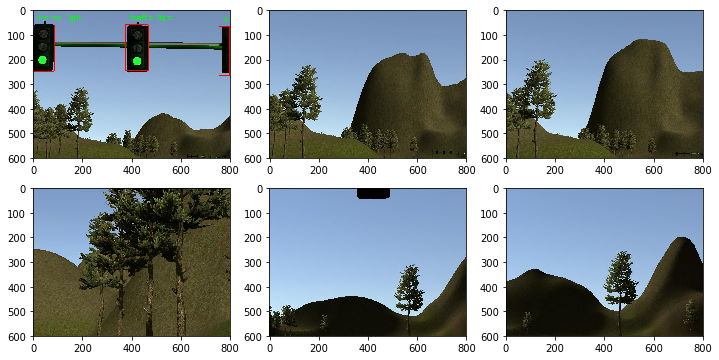

In [44]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

simulator_image_path = './data/simulator_traffic_lights/image_color'
real_image_path = './data/traffic_light_bag_file/image_color'

simulator_image = ['frame000000.png', 'frame000110.png', 'frame000140.png',
                   'frame000167.png', 'frame000223.png', 'frame000246.png']
real_image = ['frame000000.png', 'frame000048.png', 'frame000053.png',
            'frame000116.png', 'frame000193.png', 'frame000284.png']

plt.figure()
fig, axes = plt.subplots(2,3, figsize=(12,6))
for i,image_name in enumerate(simulator_image):
    file_path = os.path.join(simulator_image_path, image_name)
    print('debug', file_path)
    image = Image.open(file_path)
    r_image = net.predict2(np.asarray(image))
    axes[i//3,i%3].imshow(r_image)
    
plt.show()

debug ./data/traffic_light_bag_file/image_color/frame000000.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] airplane: 0.73612124
debug ./data/traffic_light_bag_file/image_color/frame000048.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] airplane: 0.6711462
debug ./data/traffic_light_bag_file/image_color/frame000053.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] airplane: 0.76554453
debug ./data/traffic_light_bag_file/image_color/frame000116.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] airplane: 0.57052714
debug ./data/traffic_light_bag_file/image_color/frame000193.png
[INFO

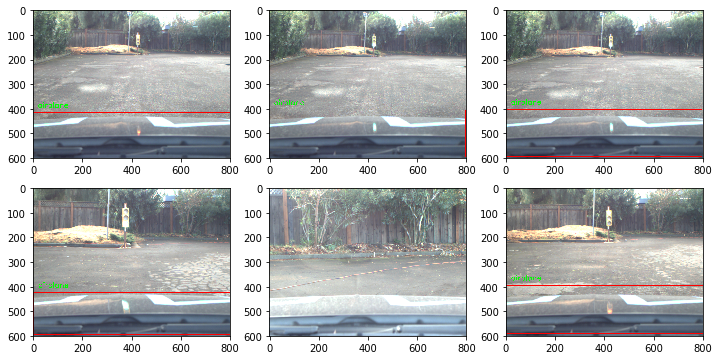

In [45]:
plt.figure()
fig, axes = plt.subplots(2,3, figsize=(12,6))
for i,image_name in enumerate(real_image):
    file_path = os.path.join(real_image_path, image_name)
    print('debug', file_path)
    image = Image.open(file_path)
    r_image = net.predict2(np.asarray(image))
    axes[i//3,i%3].imshow(r_image)
    
plt.show()

In [ ]:
from glob import glob
import shutil
import scipy.misc

simulator_infer_path = './run/ssd_mobile_v2_simulator'
real_infer_path = './run/ssd_mobile_v2_real'

output_dir = simulator_infer_path
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

for image_file in glob(os.path.join(simulator_image_path,'*.png')):
    image = Image.open(image_file)
    r_image = net.predict2(np.asarray(image))
    scipy.misc.imsave(os.path.join(simulator_infer_path, os.path.basename(image_file)), r_image)

In [ ]:
output_dir = real_infer_path
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

for image_file in glob(os.path.join(real_image_path,'*.png')):
    image = Image.open(image_file)
    r_image = net.predict2(np.asarray(image))
    scipy.misc.imsave(os.path.join(real_infer_path, os.path.basename(image_file)), r_image)

## SSD inception v2

In [60]:
model_name = "./model/ssd_inception_v2_coco_2018_01_28"

net = Net(graph_fp='%s/frozen_inference_graph.pb' % model_name,
                           labels_fp='./model/zoo_script/data/label.pbtxt',
                           num_classes=90,
                           threshold=0.3)

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 1500, width: 1000]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.95031905
[INFO] person: 0.93936414
[INFO] person: 0.6274502
[INFO] person: 0.5377153
[INFO] person: 0.51538557
[INFO] person: 0.43139789
[INFO] baseball glove: 0.32008374


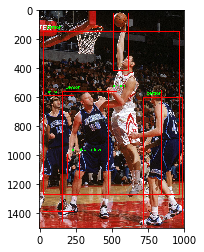

In [69]:
file_path = './training_data/test_images/1.jpg'
image = Image.open(file_path)
r_image = net.predict2(np.asarray(image))
plt.imshow(r_image)

debug ./training_data/simulator_traffic_lights/image_color/frame000000.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.8263755
[INFO] traffic light: 0.691605
debug ./training_data/simulator_traffic_lights/image_color/frame000110.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./training_data/simulator_traffic_lights/image_color/frame000140.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.4022118
debug ./training_data/simulator_traffic_lights/image_color/frame000167.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./training_data/simulator_traffic_l

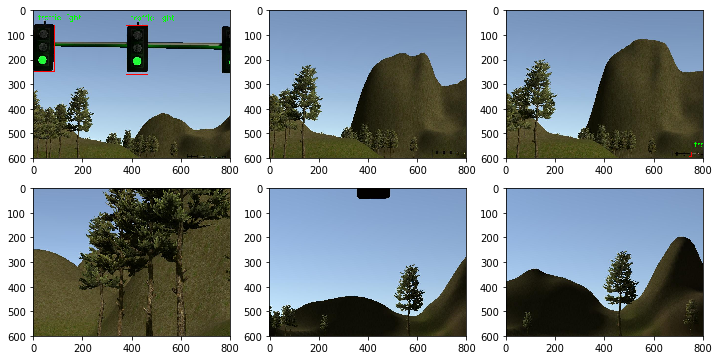

In [61]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

simulator_image_path = './training_data/simulator_traffic_lights/image_color'
real_image_path = './training_data/traffic_light_bag_file/image_color'

simulator_image = ['frame000000.png', 'frame000110.png', 'frame000140.png',
                   'frame000167.png', 'frame000223.png', 'frame000246.png']
real_image = ['frame000000.png', 'frame000048.png', 'frame000053.png',
            'frame000116.png', 'frame000193.png', 'frame000284.png']

plt.figure()
fig, axes = plt.subplots(2,3, figsize=(12,6))
for i,image_name in enumerate(simulator_image):
    file_path = os.path.join(simulator_image_path, image_name)
    print('debug', file_path)
    image = Image.open(file_path)
    r_image = net.predict2(np.asarray(image))
    axes[i//3,i%3].imshow(r_image)
    
plt.show()

debug ./training_data/traffic_light_bag_file/image_color/frame000000.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./training_data/traffic_light_bag_file/image_color/frame000048.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./training_data/traffic_light_bag_file/image_color/frame000053.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./training_data/traffic_light_bag_file/image_color/frame000116.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./training_data/traffic_light_bag_file/image_color/frame000193.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, 

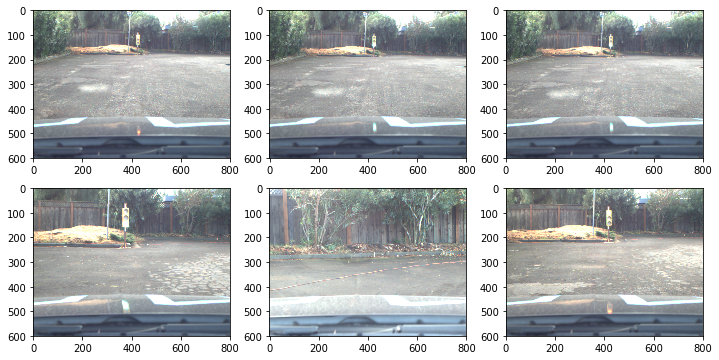

In [62]:
plt.figure()
fig, axes = plt.subplots(2,3, figsize=(12,6))
for i,image_name in enumerate(real_image):
    file_path = os.path.join(real_image_path, image_name)
    print('debug', file_path)
    image = Image.open(file_path)
    r_image = net.predict2(np.asarray(image))
    axes[i//3,i%3].imshow(r_image)
    
plt.show()

In [58]:
from glob import glob
import shutil
import scipy.misc

simulator_infer_path = './run/ssd_inception_v2_simulator'
real_infer_path = './run/ssd_inception_v2_real'

output_dir = simulator_infer_path
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

for image_file in glob(os.path.join(simulator_image_path,'*.png')):
    image = Image.open(image_file)
    r_image = net.predict2(np.asarray(image))
    scipy.misc.imsave(os.path.join(simulator_infer_path, os.path.basename(image_file)), r_image)

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...


/home/tom/anaconda3/envs/carnd-capstone/lib/python3.5/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  app.launch_new_instance()


[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.82896525
[INFO] traffic light: 0.69840235
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.8626285
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.8904847
[INFO] traffic light: 0.8670593
[INFO] traffic light: 0.8400545
[INFO] traffic light: 0.7193316
[INFO] traffic light: 0.59437084
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.9487229
[INFO] traffic light: 0.880439
[INFO] traffic light: 0.7245292
[INFO] traffic light: 0.5296128
[INFO] traffic light: 0.4348859
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.97591555
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.7408764
[INFO] Read the image ..
[INFO] Shape of this image

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.8263755
[INFO] traffic light: 0.691605
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] D

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.82896525
[INFO] traffic light: 0.69840235
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.91777813
[INFO] traffic light: 0.8210171
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.52198625
[INFO] traffic light: 0.4636502
[INFO] traffic light: 0.44679204
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.88573045
[INFO] traffic light: 0.6219925
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.6213671
[INFO] traffic light: 0.593321
[INFO] traffic light: 0.44376928
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.8149904
[INF

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.91374135
[INFO] traffic light: 0.90301156
[INFO] traffic light: 0.8411312
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.9564258
[INFO] traffic light: 0.

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.8179525
[INFO] traffic light: 0.40640718
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.9549819
[INFO] traffic light: 0.9388137
[INFO] traffic light: 0.847236
[INFO] traffic light: 0.8204645
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting obj

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.7898403
[INFO] traffic light: 0.78809094
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO]

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.43349138
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.7304064
[INFO] traffic light: 0.4692161
[INFO] traffic light: 0.4468802
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.6133549
[INFO] traffic light: 0.5972296
[INFO] traffic light: 0.42052814
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] cat: 0.41796577
[INFO] Read the image ..
[INFO] Shape of this image i

[INFO] Filtering results ...
[INFO] traffic light: 0.6545979
[INFO] traffic light: 0.5823346
[INFO] traffic light: 0.49786046
[INFO] traffic light: 0.45526543
[INFO] traffic light: 0.45033684
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.9443339
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.8200138
[INFO] traffic light: 0.6812721
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.91709816
[INFO] traffic light: 0.87701654
[INFO] traffic light: 0.8592818
[INFO] traffic light: 0.44814733
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.66634035
[INFO] traffic light: 0.52885145
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detectin

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.94032866
[INFO] traffic light: 0.651826
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.8701982
[INFO] traffic light: 0.8429529
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.92028284
[INFO] traffic light: 0.6297301
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.9189436
[INFO] traffic light: 0.9155662
[INFO] traffic light: 0.7205013
[INFO] traffic light: 0.5520643
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting ob

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.5210398
[INFO] traffic light: 0.45652607
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO]

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.8278355
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.842538
[INFO] traffic light: 0.77232814
[INFO] traffic light: 0.42349347
[INFO] Read the image ..


In [63]:
output_dir = real_infer_path
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

for image_file in glob(os.path.join(real_image_path,'*.png')):
    image = Image.open(image_file)
    r_image = net.predict2(np.asarray(image))
    scipy.misc.imsave(os.path.join(real_infer_path, os.path.basename(image_file)), r_image)

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...


/home/tom/anaconda3/envs/carnd-capstone/lib/python3.5/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  if __name__ == '__main__':


[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] car: 0.46287185
[INFO] car: 0.3433942
[INFO] car: 0.32491007
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.4898415
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] car: 0.49609327
[INFO] car: 0.39184356
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] person: 0.3578828
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]


[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.35612765
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Fi

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] car: 0.67468864
[INFO] car: 0.5115247
[INFO] car: 0.48773938
[INFO] car: 0.32628787
[INFO] car: 0.32115027
[INFO] car: 0.31034988
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] bed: 0.33343136
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering result

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] traffic light: 0.65133727
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] car: 0.37976065
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detectin

KeyboardInterrupt: 

## DomianF model on [link](https://github.com/damfinn1/capstone?1534039458554) as of 13 August

In [27]:
model_name = "./model/ssd_inception_v2_coco_udacity_dropout_training_bag_tf13"

net = Net(graph_fp='%s/frozen_inference_graph.real.pb' % model_name,
                           labels_fp='./model/ssd_inception_v2_coco_udacity_dropout_training_bag_tf13/label.pbtxt',
                           num_classes=4,
                           threshold=0.4)

In [39]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

simulator_image_path = './training_data/simulator_traffic_lights/image_color'
real_image_path = './training_data/traffic_light_bag_files_course/loop_with_traffic_light'
#real_image_path = './training_data/traffic_light_bag_files_course/just_traffic_light'
real_image_path = './training_data/traffic_light_bag_file/image_raw'



In [ ]:
simulator_image = ['frame000000.png', 'frame000110.png', 'frame000140.png',
                   'frame000167.png', 'frame000223.png', 'frame000246.png']


plt.figure()
fig, axes = plt.subplots(2,3, figsize=(12,6))
for i,image_name in enumerate(simulator_image):
    file_path = os.path.join(simulator_image_path, image_name)
    print('debug', file_path)
    image = Image.open(file_path)
    r_image = net.predict2(np.asarray(image))
    axes[i//3,i%3].imshow(r_image)
    
plt.show()

debug ./training_data/traffic_light_bag_files_course/just_traffic_light/frame000000.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 1096, width: 1368]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] RED: 0.79696363
debug ./training_data/traffic_light_bag_files_course/just_traffic_light/frame000048.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 1096, width: 1368]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] RED: 0.40808094
debug ./training_data/traffic_light_bag_files_course/just_traffic_light/frame000053.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 1096, width: 1368]
[INFO] Detecting objects ...
[INFO] Filtering results ...
debug ./training_data/traffic_light_bag_files_course/just_traffic_light/frame000116.png
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 1096, width: 1368]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] RED: 0.9722927
debug ./

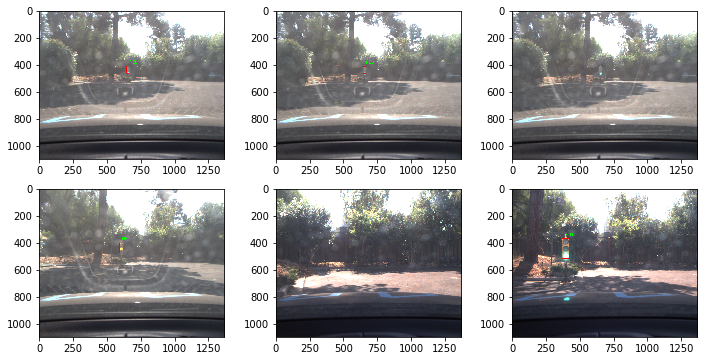

In [12]:
real_image = ['frame000000.png', 'frame000048.png', 'frame000053.png',
            'frame000116.png', 'frame000193.png', 'frame000284.png']

plt.figure()
fig, axes = plt.subplots(2,3, figsize=(12,6))
for i,image_name in enumerate(real_image):
    file_path = os.path.join(real_image_path, image_name)
    print('debug', file_path)
    image = Image.open(file_path)
    r_image = net.predict2(np.asarray(image))
    axes[i//3,i%3].imshow(r_image)
    
plt.show()

In [29]:
from glob import glob
import shutil
import scipy.misc

simulator_infer_path = './run/ssd_inception_DamianF_simulator'
real_infer_path = './run/ssd_inception_DamianF_real'

In [41]:
output_dir = simulator_infer_path
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

for image_file in glob(os.path.join(simulator_image_path,'*.png')):
    #image = Image.open(image_file)
    image = cv2.imread(image_file)
    r_image = net.predict2(np.asarray(image))
    r_image = cv2.cvtColor(r_image, cv2.COLOR_BGR2RGB)
    scipy.misc.imsave(os.path.join(simulator_infer_path, os.path.basename(image_file)), r_image)

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...


/home/tom/anaconda3/envs/carnd-capstone/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()


[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.4155108
[INFO] GREEN: 0.41001675
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objec

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.4155108
[INFO] GREEN: 0.41001675
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objec

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.46794987
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filter

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filter

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read t

In [40]:
output_dir = real_infer_path
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

for image_file in glob(os.path.join(real_image_path,'*.png')):
    #image = Image.open(image_file)
    #image = np.asarray(image)
    #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image = cv2.imread(image_file)
    r_image = net.predict2(image)
    r_image = cv2.cvtColor(r_image, cv2.COLOR_BGR2RGB)
    scipy.misc.imsave(os.path.join(real_infer_path, os.path.basename(image_file)), r_image)

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...


/home/tom/anaconda3/envs/carnd-capstone/lib/python3.5/site-packages/ipykernel_launcher.py:13: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  del sys.path[0]


[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9468175
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.4534225
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.48593104
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.47509655
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.88039356
[INFO] GREEN: 0.75014895
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8432319
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.42636386
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8332643
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9309563
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8784268
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.5474608
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.7869851
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.987713
[INFO] GREEN: 0.6950339
[INFO] Read the image ..
[INFO] Sha

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.64679164
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.47730628
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.82309663
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 8

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9920934
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.44484577
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.74084574
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8740222
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9454664
[INFO] Read the image ..
[INFO] 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.75401187
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.58079904
[INFO] RED: 0.53169787
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.88925004
[INFO] Read the image ..
[INFO] Shape of this image is -

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.6806303
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.6633253
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.5639209
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.88283277
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8677026
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.7292227
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8397913
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.6077083
[INFO] Read the image ..
[INFO] S

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.52650636
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.49616078
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting obje

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.65857416
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8922753
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8043264
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.92242354
[INFO] GREEN: 0.51219535
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8027437
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.78668576
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.6813359
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objec

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9397276
[INFO] GREEN: 0.5559779
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.43315455
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.63835996
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.41873822
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.65976477
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9676399
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.5694483
[INFO] Read the image ..
[INFO] Shape of this image is -

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.6465425
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.7812941
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.49828264
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.98130655
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] RED: 0.6710687
[INFO] GREEN: 0.6460193
[INFO] Rea

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8704772
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering r

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9642073
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.64958346
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9136491
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.6832408
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.87232554
[INFO] Read the image ..
[INFO] 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.56283915
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.90545774
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.6283732
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9938478
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9540506
[INFO] Read the image ..
[INFO] 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9841697
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.6239346
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.99511814
[INFO] GREEN: 0.42604008
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.4232216
[INFO] Read the image ..
[INFO] 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.49081424
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8789254
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objec

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.98137
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.7088122
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.98193055
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.61970985
[INFO] RED: 0.47686204
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9917488
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.7927896
[INFO] Read the image ..
[INFO] S

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.995994
[INFO] GREEN: 0.48827156
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9833402
[INFO] GREEN: 0.58394265
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is --

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.98703814
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.98929745
[INFO] GREEN: 0.9120146
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.5163191
[INFO] RED: 0.5007074
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Sh

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] RED: 0.73217314
[INFO] GREEN: 0.47532943
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.43293458
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.61467695
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.97531337
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9523348
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8849917
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8483181
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.62954104
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.4627325
[INFO] R

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.83587
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.7702799
[INFO] RED: 0.41481435
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[I

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.4166389
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9889981
[INFO] GREEN: 0.8702368
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.6757576
[INFO] Read the image ..
[INFO] Shape of this image is -- 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9949706
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.99442506
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.6950062
[INFO] RED: 0.43141246
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.63556165
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9755982
[INFO] Re

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.7552193
[INFO] RED: 0.5302736
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.5027207
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.52209306
[INFO] Read the image ..
[INFO] Shape of this image is -- [

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.46261042
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8799077
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.65698206
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.7849904
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8749446
[INFO] Read the image ..
[INFO] Shape of this image is --

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.68680465
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.6217828
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objec

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.675139
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.6998874
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.5288794
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.67197925
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objec

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9794023
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8830166
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.953236
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]


[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.98990357
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9668481
[INFO] GREEN: 0.4159565
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.4215233
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.83290535
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] 

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8213753
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.7780516
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.48337406
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800

[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.7490643
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.84350234
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.9622198
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.88771504
[INFO] Read the image ..
[INFO] Shape of this image is -- [heigh: 600, width: 800]
[INFO] Detecting objects ...
[INFO] Filtering results ...
[INFO] GREEN: 0.8241432
[INFO] Read the image ..
[INFO] 

In [26]:
class Model(object):
    def __init__(self, model_path):
        print('debug', model_path)
        self.model = self.load_graph(model_path)

        #with self.model.as_default():
            #with self.session as sess:
        tf_config = tf.ConfigProto(device_count={'gpu': 0}, log_device_placement=True)
        tf_config.gpu_options.allow_growth = True
        with self.model.as_default():
            self.session = tf.Session(config=tf_config, graph=self.model)
            # TODO: are these correct for our models? most prob not. getinfo from Damian
            # TODO: I assume it will be different for site and sim.
            # then better to write two "get_classification" functions
            # Damian comment: These are correct. They will be the same for Real & Sim Models
            self.image_tensor = self.model.get_tensor_by_name('image_tensor:0')
            self.detect_boxes = self.model.get_tensor_by_name('detection_boxes:0')
            self.detect_scores = self.model.get_tensor_by_name('detection_scores:0')
            self.detect_classes = self.model.get_tensor_by_name('detection_classes:0')
            self.num_detections = self.model.get_tensor_by_name('num_detections:0')

    def detect_traffic_light(self, image):

        # Expand dimensions since the model expects image to have shape : [1, None, None,3]
        image_np_expanded = np.expand_dims(image, axis=0)

        (boxes, scores, classes, num) = self.session.run([self.detect_boxes, self.detect_scores, self.detect_classes, self.num_detections],
                                                 feed_dict={self.image_tensor: image_np_expanded})

        num = int(num)

        detected_lights = []
        for i in range(0, num):
            detected_light = 4 #TrafficLight.UNKNOWN
            if scores[0][i] > 0.4:  # TODO: tune this threshold
                if int(classes[0][i]) == 1:
                    detected_light = 1 # TrafficLight.RED
                elif int(classes[0][i]) == 2:
                    detected_light = 2 #TrafficLight.GREEN
                elif int(classes[0][i]) == 3:
                    detected_light = 3 #TrafficLight.YELLOW
                else:
                    detected_light = 4 #TrafficLight.UNKNOWN

            detected_lights.append(detected_light)

        # TODO: make sure the enumeration used in models are the same as in styx_msgs/TrafficLight
        if len(detected_lights) > 0:
            return detected_lights[0]
        else:
            return TrafficLight.UNKNOWN

    # CODE FROM https://github.com/alex-lechner/Traffic-Light-Classification
    def load_graph(self, graph_file):
        # """Loads a frozen inference graph"""
        graph = tf.Graph()
        with graph.as_default():
            od_graph_def = tf.GraphDef()
            with tf.gfile.GFile(graph_file, 'rb') as fid:
                serialized_graph = fid.read()
                od_graph_def.ParseFromString(serialized_graph)
                tf.import_graph_def(od_graph_def, name='')
        return graph

In [ ]:
for image_file in glob(os.path.join(real_image_path,'*.png')):
    image = Image.open(image_file)
    image = np.asarray(image)
    #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    r_image = net.predict2(image)
    scipy.misc.imsave(os.path.join(real_infer_path, os.path.basename(image_file)), r_image)

### YOLO v3

In [3]:
from keras.models import load_model
K.set_learning_phase(0)

# load the model from h5
sess = K.get_session()
model_path = './model/yolo_v3_coco/yolo.h5'
yolo_model = load_model(model_path, compile=False)

# output the model architecture
yolo_model.summary()

Instructions for updating:
keep_dims is deprecated, use keepdims instead
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, None, None, 3) 0                                            
____________________________________________________________________________________________________
conv2d_1 (Conv2D)                (None, None, None, 32 864         input_1[0][0]                    
____________________________________________________________________________________________________
batch_normalization_1 (BatchNorm (None, None, None, 32 128         conv2d_1[0][0]                   
____________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)        (None, None, None, 32 0           batch_normalization_1[0][0]      
__________________

In [10]:
import sys
sys.path.append('./ros/src/tl_detector')

%run ./ros/src/tl_detector/yolo3/utils.py
%run ./ros/src/tl_detector/yolo3/model.py

In [14]:
from timeit import default_timer as timer
from PIL import Image, ImageFont, ImageDraw

class YOLO(object):
    _defaults = {
        "model_path": './model/yolo_v3_coco/yolo.h5',
        "anchors_path": './model/yolo_v3_coco/yolo_anchors.txt',
        "classes_path": './model/yolo_v3_coco/coco_classes.txt',
        "score" : 0.3,
        "iou" : 0.45,
        "model_image_size" : (416, 416),
        "gpu_num" : 1,
    }

    @classmethod
    def get_defaults(cls, n):
        if n in cls._defaults:
            return cls._defaults[n]
        else:
            return "Unrecognized attribute name '" + n + "'"

    def __init__(self, **kwargs):
        self.__dict__.update(self._defaults) # set up default values
        self.__dict__.update(kwargs) # and update with user overrides
        self.class_names = self._get_class()
        self.anchors = self._get_anchors()
        self.sess = K.get_session()
        self.boxes, self.scores, self.classes = self.generate()

    def _get_class(self):
        classes_path = os.path.expanduser(self.classes_path)
        with open(classes_path) as f:
            class_names = f.readlines()
        class_names = [c.strip() for c in class_names]
        return class_names

    def _get_anchors(self):
        anchors_path = os.path.expanduser(self.anchors_path)
        with open(anchors_path) as f:
            anchors = f.readline()
        anchors = [float(x) for x in anchors.split(',')]
        return np.array(anchors).reshape(-1, 2)

    def generate(self):
        model_path = os.path.expanduser(self.model_path)
        assert model_path.endswith('.h5'), 'Keras model or weights must be a .h5 file.'

        # Load model, or construct model and load weights.
        num_anchors = len(self.anchors)
        num_classes = len(self.class_names)
        is_tiny_version = num_anchors==6 # default setting
        try:
            self.yolo_model = load_model(model_path, compile=False)
        except:
            self.yolo_model = tiny_yolo_body(Input(shape=(None,None,3)), num_anchors//2, num_classes) \
                if is_tiny_version else yolo_body(Input(shape=(None,None,3)), num_anchors//3, num_classes)
            self.yolo_model.load_weights(self.model_path) # make sure model, anchors and classes match
        else:
            assert self.yolo_model.layers[-1].output_shape[-1] == \
                num_anchors/len(self.yolo_model.output) * (num_classes + 5), \
                'Mismatch between model and given anchor and class sizes'

        print('{} model, anchors, and classes loaded.'.format(model_path))

        # Generate colors for drawing bounding boxes.
        hsv_tuples = [(x / len(self.class_names), 1., 1.)
                      for x in range(len(self.class_names))]
        self.colors = list(map(lambda x: colorsys.hsv_to_rgb(*x), hsv_tuples))
        self.colors = list(
            map(lambda x: (int(x[0] * 255), int(x[1] * 255), int(x[2] * 255)),
                self.colors))
        np.random.seed(10101)  # Fixed seed for consistent colors across runs.
        np.random.shuffle(self.colors)  # Shuffle colors to decorrelate adjacent classes.
        np.random.seed(None)  # Reset seed to default.

        # Generate output tensor targets for filtered bounding boxes.
        self.input_image_shape = K.placeholder(shape=(2, ))
        # if self.gpu_num>=2:
        #    self.yolo_model = multi_gpu_model(self.yolo_model, gpus=self.gpu_num)
        boxes, scores, classes = yolo_eval(self.yolo_model.output, self.anchors,
                len(self.class_names), self.input_image_shape,
                score_threshold=self.score, iou_threshold=self.iou)
        return boxes, scores, classes

    def detect_image(self, image):
        start = timer()

        if self.model_image_size != (None, None):
            assert self.model_image_size[0]%32 == 0, 'Multiples of 32 required'
            assert self.model_image_size[1]%32 == 0, 'Multiples of 32 required'
            boxed_image = letterbox_image(image, tuple(reversed(self.model_image_size)))
        else:
            new_image_size = (image.width - (image.width % 32),
                              image.height - (image.height % 32))
            boxed_image = letterbox_image(image, new_image_size)
        image_data = np.array(boxed_image, dtype='float32')

        print(image_data.shape)
        image_data /= 255.
        image_data = np.expand_dims(image_data, 0)  # Add batch dimension.

        out_boxes, out_scores, out_classes = self.sess.run(
            [self.boxes, self.scores, self.classes],
            feed_dict={
                self.yolo_model.input: image_data,
                self.input_image_shape: [image.size[1], image.size[0]],
                #K.learning_phase(): 0
            })

        print('Found {} boxes for {}'.format(len(out_boxes), 'img'))

        #font = ImageFont.truetype(font='font/FiraMono-Medium.otf',
        #            size=np.floor(3e-2 * image.size[1] + 0.5).astype('int32'))
        font = ImageFont.truetype("arial.ttf",
                    size=np.floor(3e-2 * image.size[1] + 0.5).astype('int32'))
        
        thickness = (image.size[0] + image.size[1]) // 300

        for i, c in reversed(list(enumerate(out_classes))):
            predicted_class = self.class_names[c]
            box = out_boxes[i]
            score = out_scores[i]

            label = '{} {:.2f}'.format(predicted_class, score)
            draw = ImageDraw.Draw(image)
            label_size = draw.textsize(label, font)

            top, left, bottom, right = box
            top = max(0, np.floor(top + 0.5).astype('int32'))
            left = max(0, np.floor(left + 0.5).astype('int32'))
            bottom = min(image.size[1], np.floor(bottom + 0.5).astype('int32'))
            right = min(image.size[0], np.floor(right + 0.5).astype('int32'))
            print(label, (left, top), (right, bottom))

            if top - label_size[1] >= 0:
                text_origin = np.array([left, top - label_size[1]])
            else:
                text_origin = np.array([left, top + 1])

            # My kingdom for a good redistributable image drawing library.
            for i in range(thickness):
                draw.rectangle(
                    [left + i, top + i, right - i, bottom - i],
                    outline=self.colors[c])
            draw.rectangle(
                [tuple(text_origin), tuple(text_origin + label_size)],
                fill=self.colors[c])
            draw.text(text_origin, label, fill=(0, 0, 0), font=font)
            del draw

        end = timer()
        print(end - start)
        return image
    
    def detect_image2(self, image):
        start = timer()

        if self.model_image_size != (None, None):
            assert self.model_image_size[0]%32 == 0, 'Multiples of 32 required'
            assert self.model_image_size[1]%32 == 0, 'Multiples of 32 required'
            boxed_image = letterbox_image(image, tuple(reversed(self.model_image_size)))
        else:
            new_image_size = (image.width - (image.width % 32),
                              image.height - (image.height % 32))
            boxed_image = letterbox_image(image, new_image_size)
        image_data = np.array(boxed_image, dtype='float32')

        print(image_data.shape)
        image_data /= 255.
        image_data = np.expand_dims(image_data, 0)  # Add batch dimension.

        out_boxes, out_scores, out_classes = self.sess.run(
            [self.boxes, self.scores, self.classes],
            feed_dict={
                self.yolo_model.input: image_data,
                self.input_image_shape: [image.size[1], image.size[0]],
                #K.learning_phase(): 0
            })

        print('Found {} boxes for {}'.format(len(out_boxes), 'img'))
        return out_boxes, out_scores, out_classes

    def close_session(self):
        self.sess.close()

In [15]:
yolo= YOLO()

./model/yolo_v3_coco/yolo.h5 model, anchors, and classes loaded.


debug ./training_data/simulator_traffic_lights/image_color/frame000000.png
(416, 416, 3)
Found 3 boxes for img
traffic light 0.99 (1, 57) (89, 246)
traffic light 0.99 (763, 67) (800, 256)
traffic light 1.00 (379, 58) (471, 249)
3.2641668879950885
debug ./training_data/simulator_traffic_lights/image_color/frame000110.png
(416, 416, 3)
Found 0 boxes for img
0.06741619799868204
debug ./training_data/simulator_traffic_lights/image_color/frame000140.png
(416, 416, 3)
Found 0 boxes for img
0.06571033998625353
debug ./training_data/simulator_traffic_lights/image_color/frame000167.png
(416, 416, 3)
Found 0 boxes for img
0.07497761299600825
debug ./training_data/simulator_traffic_lights/image_color/frame000223.png
(416, 416, 3)
Found 0 boxes for img
0.06642322699190117
debug ./training_data/simulator_traffic_lights/image_color/frame000246.png
(416, 416, 3)
Found 0 boxes for img
0.06902906697359867


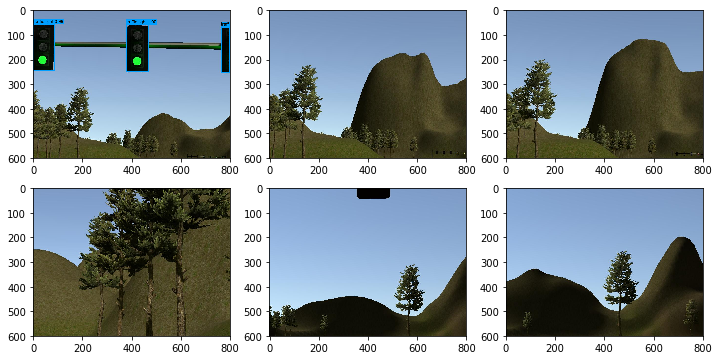

In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

simulator_image_path = './training_data/simulator_traffic_lights/image_color'
real_image_path = './training_data/traffic_light_bag_file/image_color'

simulator_image = ['frame000000.png', 'frame000110.png', 'frame000140.png',
                   'frame000167.png', 'frame000223.png', 'frame000246.png']
real_image = ['frame000000.png', 'frame000048.png', 'frame000053.png',
            'frame000116.png', 'frame000193.png', 'frame000284.png']

plt.figure()
fig, axes = plt.subplots(2,3, figsize=(12,6))
for i,image_name in enumerate(simulator_image):
    file_path = os.path.join(simulator_image_path, image_name)
    print('debug', file_path)
    image = Image.open(file_path)
    r_image = yolo.detect_image(image)
    axes[i//3,i%3].imshow(r_image)
    
plt.show()

debug ./training_data/traffic_light_bag_file/image_color/frame000000.png
(416, 416, 3)
Found 1 boxes for img
car 0.50 (0, 422) (800, 564)
0.09345612602191977
debug ./training_data/traffic_light_bag_file/image_color/frame000048.png
(416, 416, 3)
Found 1 boxes for img
car 0.37 (0, 420) (800, 556)
0.09739885199815035
debug ./training_data/traffic_light_bag_file/image_color/frame000053.png
(416, 416, 3)
Found 0 boxes for img
0.10042956299730577
debug ./training_data/traffic_light_bag_file/image_color/frame000116.png
(416, 416, 3)
Found 2 boxes for img
traffic light 0.79 (359, 74) (393, 163)
boat 0.51 (0, 418) (797, 569)
0.09302161299274303
debug ./training_data/traffic_light_bag_file/image_color/frame000193.png
(416, 416, 3)
Found 0 boxes for img
0.09378856301191263
debug ./training_data/traffic_light_bag_file/image_color/frame000284.png
(416, 416, 3)
Found 0 boxes for img
0.09853073098929599


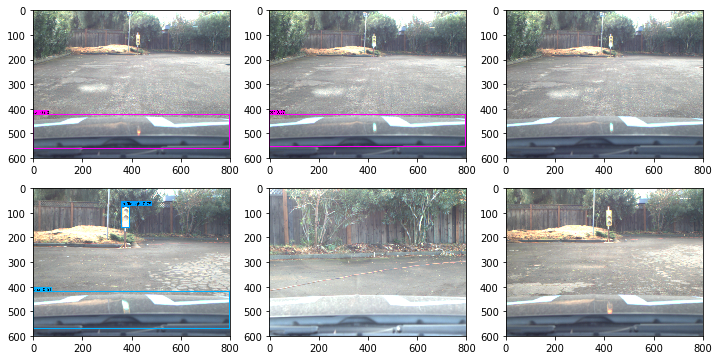

In [14]:
plt.figure()
fig, axes = plt.subplots(2,3, figsize=(12,6))
for i,image_name in enumerate(real_image):
    file_path = os.path.join(real_image_path, image_name)
    print('debug', file_path)
    image = Image.open(file_path)
    r_image = yolo.detect_image(image)
    axes[i//3,i%3].imshow(r_image)
    
plt.show()

In [15]:
from glob import glob
import shutil
import scipy.misc


simulator_infer_path = './run/yolo_simulator'
real_infer_path = './run/yolo_real'

output_dir = simulator_infer_path
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

for image_file in glob(os.path.join(simulator_image_path,'*.png')):
    image = Image.open(image_file)
    r_image = yolo.detect_image(image)
    scipy.misc.imsave(os.path.join(simulator_infer_path, os.path.basename(image_file)), r_image)

(416, 416, 3)
Found 0 boxes for img
0.0817937949905172


/home/tom/anaconda3/envs/carnd-capstone/lib/python3.5/site-packages/ipykernel_launcher.py:17: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


(416, 416, 3)
Found 0 boxes for img
0.09592931100632995
(416, 416, 3)
Found 3 boxes for img
traffic light 0.99 (764, 67) (800, 256)
traffic light 0.99 (1, 57) (89, 246)
traffic light 1.00 (379, 58) (471, 249)
0.10033012100029737
(416, 416, 3)
Found 0 boxes for img
0.07277639000676572
(416, 416, 3)
Found 0 boxes for img
0.0905535539786797
(416, 416, 3)
Found 3 boxes for img
traffic light 0.99 (671, 214) (738, 359)
traffic light 1.00 (90, 186) (167, 346)
traffic light 1.00 (384, 198) (458, 351)
0.09985774499364197
(416, 416, 3)
Found 0 boxes for img
0.09099311698810197
(416, 416, 3)
Found 0 boxes for img
0.07960911199916154
(416, 416, 3)
Found 4 boxes for img
traffic light 0.81 (658, 477) (681, 529)
traffic light 0.91 (758, 478) (786, 530)
person 0.36 (290, 468) (317, 516)
person 0.45 (262, 453) (288, 512)
0.09553331200731918
(416, 416, 3)
Found 3 boxes for img
traffic light 0.98 (119, 398) (152, 477)
traffic light 0.98 (406, 410) (442, 482)
traffic light 0.99 (263, 403) (300, 481)
0.079

KeyboardInterrupt: 

In [ ]:
output_dir = real_infer_path
if os.path.exists(output_dir):
    shutil.rmtree(output_dir)
os.makedirs(output_dir)

for image_file in glob(os.path.join(real_image_path,'*.png')):
    image = Image.open(image_file)
    r_image = yolo.detect_image(image)
    scipy.misc.imsave(os.path.join(real_infer_path, os.path.basename(image_file)), r_image)

In [ ]:
#take a look at https://github.com/level5-engineers/traffic-light-classification

## Simulator detection pipeline


In [49]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

def detect_traffic_light_state(image):
    def simple_thresh(img,thresh=(0, 255)):
       #apply only thresholding on image plane and return binary image
        binary = np.zeros_like(img)
        binary[(img > thresh[0]) & (img <= thresh[1])] = 1
        return binary


    #print RGB
    #print(image.shape[0]) #rows
    #print(image.shape[1]) #columns
    #print(image.shape[2])
    #fig = plt.figure()
    #plt.imshow(image[:,:,0],cmap='gray') # R
    #fig = plt.figure()
    #plt.imshow(image[:,:,1],cmap='gray') # G
    #fig = plt.figure()
    #plt.imshow(image[:,:,2],cmap='gray') # B

    rows = image.shape[0]

    #thresholding on red channel
    red_channel = image[:,:,0]
    r_binary = simple_thresh(red_channel,(140, 255))
    #fig = plt.figure()
    #plt.imshow(r_binary,cmap='gray') # R_binary


    #thresholding on green channel
    green_channel = image[:,:,1]
    g_binary = simple_thresh(green_channel,(140, 255))
    #fig = plt.figure()
    #plt.imshow(g_binary,cmap='gray') # R_binary

    #patitioning on r_binary
    r_binary_1 = r_binary[0:int(rows/3)-1,:]
    r_binary_2 = r_binary[int(rows/3):(2*int(rows/3))-1,:]
    r_binary_3 = r_binary[(2*int(rows/3)):rows-1,:]

    #patitioning on g_binary
    g_binary_1 = g_binary[0:int(rows/3)-1,:]
    g_binary_2 = g_binary[int(rows/3):(2*int(rows/3))-1,:]
    g_binary_3 = g_binary[(2*int(rows/3)):rows-1,:]

    #region sum
    r_binary_1_sum = r_binary_1.sum()
    r_binary_2_sum = r_binary_2.sum()
    r_binary_3_sum = r_binary_3.sum()

    #region sum
    g_binary_1_sum = g_binary_1.sum()
    g_binary_2_sum = g_binary_2.sum()
    g_binary_3_sum = g_binary_3.sum()

    red_light = False
    green_light = False
    false_detection = False
    #check for red light
    if r_binary_1_sum > 2*r_binary_2_sum and r_binary_1_sum > 2*r_binary_3_sum:
        red_light = True
    elif g_binary_3_sum > 2*g_binary_2_sum and r_binary_3_sum > 2*g_binary_1_sum:
        green_light = True
    else:
        false_detection = True

    print("Red light: ", red_light, r_binary_1_sum, r_binary_2_sum, r_binary_3_sum)
    print("Green light: ", green_light, g_binary_1_sum , g_binary_2_sum, g_binary_3_sum)
    print("False detection: ", false_detection)

debug ./training_data/simulator_traffic_lights/image_color/frame000000.png
(416, 416, 3)
Found 3 boxes for img
Red light:  False 13 39 130
Green light:  False 209 147 1230
False detection:  True
Red light:  False 4 15 71
Green light:  False 187 100 256
False detection:  True
Red light:  False 10 4 163
Green light:  False 718 226 1303
False detection:  True
debug ./training_data/simulator_traffic_lights/image_color/frame000110.png
(416, 416, 3)
Found 0 boxes for img
debug ./training_data/simulator_traffic_lights/image_color/frame000140.png
(416, 416, 3)
Found 0 boxes for img
debug ./training_data/simulator_traffic_lights/image_color/frame000167.png
(416, 416, 3)
Found 0 boxes for img
debug ./training_data/simulator_traffic_lights/image_color/frame000223.png
(416, 416, 3)
Found 0 boxes for img
debug ./training_data/simulator_traffic_lights/image_color/frame000246.png
(416, 416, 3)
Found 0 boxes for img


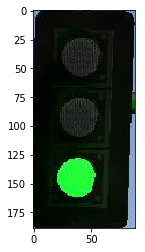

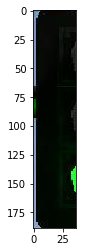

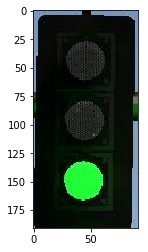

In [50]:

#fig, axes = plt.subplots(2,3, figsize=(12,6))
for i,image_name in enumerate(simulator_image):
    file_path = os.path.join(simulator_image_path, image_name)
    print('debug', file_path)
    image = Image.open(file_path)
    out_boxes, out_scores, out_classes = yolo.detect_image2(image)
    
    image_array= np.asarray(image)
    for i, c in reversed(list(enumerate(out_classes))):
        predicted_class = c #class_names[c]
        box = out_boxes[i]
        score = out_scores[i]
        #print('debug', predicted_class)
        if(predicted_class == 9):
            top, left, bottom, right = box
            top = max(0, np.floor(top + 0.5).astype('int32'))
            left = max(0, np.floor(left + 0.5).astype('int32'))
            bottom = min(image.size[1], np.floor(bottom + 0.5).astype('int32'))
            right = min(image.size[0], np.floor(right + 0.5).astype('int32'))
            corp_traffic_light = image_array[top:bottom,left:right,  :]
            plt.figure()
            plt.imshow(corp_traffic_light)
            detect_traffic_light_state(corp_traffic_light)
            
#plt.show()